# Implementing Logistic Regression with numpy

In this problem, you will need to write python codes and build logistic regression classifiers on breast cancer dataset to predict whether the cancer is malignant or benign on the patients. The dataset contains 569 samples and 30 features. You may refer to https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic) for more information about the dataset.

Your implementations should include:
- Load data, clean data and partition them into training and testing data.
- Build logistic regression and L2-regularized logistic regression models.
- Implement three gradient descent algorithms for each model: Batch Gradient Descent (GD), Mini-Batch Gradient Descent (MB-SGD) and Stochastic Gradient Descent (SGD).
- Compare the loss curve of three gradient descent algorithms (GD/MB-SGD/SGD).
- Compare logistic regression and regularized version in terms of training and testing error.
- Try to tune different parameters (regularization parameter, learning rate, etc.) to see their effects.

You could use sklearn or any other packages to load and process the data, but you can not directly use the package to train the model.


### Name: Ali Abdullah Ahmad


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [278]:
# Load Packages
import pandas as pd
import numpy as np


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [279]:
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS583_Deep_Learning/Assignments/As1/data.csv')

## 1.2 Examine and clean data

In [280]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

In [281]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [282]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [283]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [284]:
df.drop(['id','Unnamed: 32'], axis=1,inplace=True)

In [285]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [286]:
df['diagnosis'] = df['diagnosis'].map({'M':-1,'B':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1.3. Partition to training and testing sets

In [287]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [288]:
# Standardization
import numpy

# calculate mu and sig using the training set
n , d = x_train.shape
mu = numpy.mean(x_train.values, axis=0).reshape(1, d)
sig = numpy.std(x_train.values, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
radius_mean                0.013646
texture_mean               0.122535
perimeter_mean             0.017830
area_mean                  0.007201
smoothness_mean            0.221149
compactness_mean           0.068722
concavity_mean            -0.006214
concave points_mean        0.083925
symmetry_mean              0.011485
fractal_dimension_mean     0.028301
radius_se                  0.055695
texture_se                 0.130663
perimeter_se               0.018831
area_se                    0.028115
smoothness_se              0.084815
compactness_se            -0.042242
concavity_se              -0.144548
concave points_se         -0.077631
symmetry_se               -0.019083
fractal_dimension_se      -0.045792
radius_worst               0.035400
texture_worst              0.116600
perimeter_worst            0.023669
area_worst                 0.031653
smoothness_worst           0.181063
compactness_worst          0.049100
concavity_worst           -0.057414
concave points_

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [289]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    z = -y * np.dot(x,w)
    loss = (np.sum(np.log(1+np.exp(z)))/n) + (lam/2)*np.sum(w**2)
    return loss

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [290]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    z = -y * np.dot(x, w)
    g = -np.dot(x.T, y / (1 + np.exp(z))) / n + lam * w
    return g

In [291]:
def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    objvals = []
    for epoch in range(max_epoch):
        # Compute the gradient
        grad = gradient(w, x, y, lam)
        # Update the weights
        w = w - learning_rate * grad
        # Compute the objective function value
        objval = objective(w, x, y, lam)
        objvals.append(objval)
        # Print the objective value for every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch},  Objective value: {objval}')
    return w, objvals


Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [292]:
# Initialize weights
w = np.zeros((x_train.shape[1], 1))

# Set regularization parameter and learning rate
lam = 0.0
learning_rate = 0.01

# Train logistic regression using gradient descent
w_opt, objvals_gd = gradient_descent(x_train.values, y_train.values.reshape(-1, 1), lam, learning_rate, w)

# Print the optimal weights and the final objective value
print("Optimal weights:\n", w_opt)
print("Final objective value:", objvals_gd[-1])


Epoch 0,  Objective value: 0.6741008818270183
Epoch 10,  Objective value: 0.49288017727368544
Epoch 20,  Objective value: 0.35392785287384104
Epoch 30,  Objective value: 0.26924318142626985
Epoch 40,  Objective value: 0.2268598940277836
Epoch 50,  Objective value: 0.21086351266059014
Epoch 60,  Objective value: 0.2101193874593077
Epoch 70,  Objective value: 0.21819877002090957
Epoch 80,  Objective value: 0.23156392062095532
Epoch 90,  Objective value: 0.2482472718234745
Optimal weights:
 [[-0.60360309]
 [-0.332181  ]
 [-0.61923805]
 [-0.5852505 ]
 [-0.34870965]
 [-0.56039772]
 [-0.6257665 ]
 [-0.68278292]
 [-0.33328869]
 [-0.05554069]
 [-0.46503544]
 [-0.00644978]
 [-0.46286642]
 [-0.44177434]
 [ 0.02523125]
 [-0.29851651]
 [-0.26631024]
 [-0.38987288]
 [-0.03518703]
 [-0.12156983]
 [-0.64195283]
 [-0.36849694]
 [-0.65477869]
 [-0.60686607]
 [-0.37555383]
 [-0.54294978]
 [-0.59506384]
 [-0.69320256]
 [-0.37902325]
 [-0.31895321]]
Final objective value: 0.26515324785145417


In [293]:
# Initialize weights
w_reg = np.zeros((x_train.shape[1], 1))

# Set regularization parameter and learning rate
lam_reg = 0.1  # You can adjust this value for regularization
learning_rate_reg = 0.01

# Train regularized logistic regression using gradient descent
w_opt_reg, objvals_gd_reg = gradient_descent(x_train.values, y_train.values.reshape(-1, 1), lam_reg, learning_rate_reg, w_reg)

# Print the optimal weights and the final objective value
print("Optimal weights (regularized):\n", w_opt_reg)
print("Final objective value (regularized):", objvals_gd_reg[-1])


Epoch 0,  Objective value: 0.6741105578317816
Epoch 10,  Objective value: 0.4952546012854091
Epoch 20,  Objective value: 0.3632238724002048
Epoch 30,  Objective value: 0.2907227253191515
Epoch 40,  Objective value: 0.2666844115464877
Epoch 50,  Objective value: 0.2757874088485269
Epoch 60,  Objective value: 0.30706041032612796
Epoch 70,  Objective value: 0.3539898806701276
Epoch 80,  Objective value: 0.41285430089167774
Epoch 90,  Objective value: 0.48147285060859685
Optimal weights (regularized):
 [[-0.57586028]
 [-0.31691607]
 [-0.59078777]
 [-0.55833227]
 [-0.33281825]
 [-0.53485328]
 [-0.59715369]
 [-0.65148285]
 [-0.31808725]
 [-0.05318615]
 [-0.44366751]
 [-0.00620483]
 [-0.44160694]
 [-0.42143934]
 [ 0.02399461]
 [-0.28507978]
 [-0.25436438]
 [-0.37223948]
 [-0.03362237]
 [-0.11626882]
 [-0.61243782]
 [-0.35154754]
 [-0.62468825]
 [-0.57894677]
 [-0.35837549]
 [-0.51816444]
 [-0.56788567]
 [-0.66146816]
 [-0.3616208 ]
 [-0.30447103]]
Final objective value (regularized): 0.550444

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [294]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    z = yi * np.dot(xi,w)
    obj = np.log(1+np.exp(-z)) + (lam/2)*np.sum(w**2)
    g = -((yi*xi.T)/(1+np.exp(z))) + lam*w
    return obj,g.reshape(w.shape)

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [295]:
def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    objvals = []
    for epoch in range(max_epoch):
        # Shuffle the data
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        epoch_objvals = []
        
        for i in range(n):
            xi = x_shuffled[i].reshape(1, -1)
            yi = y_shuffled[i]
            obj , grad = stochastic_objective_gradient(w, xi, yi, lam)
            w -= learning_rate * grad
            epoch_objvals.append(obj)

        avg_objval = np.mean(epoch_objvals)
        objvals.append(avg_objval)
        
        # Print the objective value for every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Objective value: {obj}')
    
    return w, objvals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [296]:
# Initialize weights
w_sgd = np.zeros((x_train.shape[1], 1))

# Set regularization parameter and learning rate
lam_sgd = 0.0  # No regularization for logistic regression
learning_rate_sgd = 0.01

# Train logistic regression using stochastic gradient descent
w_opt_sgd, objvals_sgd = sgd(x_train.values, y_train.values.reshape(-1, 1), lam_sgd, learning_rate_sgd, w_sgd)

# Print the optimal weights and the final objective value
print("Optimal weights (SGD):\n", w_opt_sgd)
print("Final objective value (SGD):", objvals_sgd[-1])


Epoch 0, Objective value: [[0.00066595]]
Epoch 10, Objective value: [[0.01830064]]


Epoch 20, Objective value: [[0.00089204]]
Epoch 30, Objective value: [[7.2364003e-05]]
Epoch 40, Objective value: [[0.00027733]]
Epoch 50, Objective value: [[5.38551093]]
Epoch 60, Objective value: [[1.27723816e-06]]
Epoch 70, Objective value: [[2.30317587e-09]]
Epoch 80, Objective value: [[0.00362618]]
Epoch 90, Objective value: [[3.20398841e-06]]
Optimal weights (SGD):
 [[-0.35616317]
 [-0.46199702]
 [-0.31871251]
 [-0.65830454]
 [ 0.00456119]
 [ 0.86440587]
 [-1.17690894]
 [-1.43026102]
 [ 0.33624606]
 [-0.00497377]
 [-1.78009476]
 [ 0.25461388]
 [-0.96276187]
 [-1.47025607]
 [-0.47162449]
 [ 1.14268657]
 [ 0.1617159 ]
 [-0.13646869]
 [ 0.51305177]
 [ 0.70769136]
 [-1.14404784]
 [-1.69915136]
 [-0.8156544 ]
 [-1.36407371]
 [-0.82108188]
 [ 0.12359734]
 [-1.2322592 ]
 [-1.05493537]
 [-1.52972418]
 [-0.28401533]]
Final objective value (SGD): 0.04836134419615065


In [297]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

# Initialize weights
w_reg = np.zeros((x_train.shape[1], 1))

# Set regularization parameter and learning rate
lam_reg = 0.1
learning_rate_reg = 0.01

# Train regularized logistic regression using gradient descent
w_opt_sgd_reg, objvals_sgd_reg = sgd(x_train.values, y_train.values.reshape(-1, 1), lam_reg, learning_rate_reg, w_reg)

# Print the optimal weights and the final objective value
print("Optimal weights (regularized):\n", w_opt_reg)
print("Final objective value (regularized):", objvals_sgd_reg[-1])


Epoch 0, Objective value: [[0.11962119]]
Epoch 10, Objective value: [[0.13869625]]
Epoch 20, Objective value: [[0.31573233]]
Epoch 30, Objective value: [[0.16283853]]
Epoch 40, Objective value: [[0.07706568]]
Epoch 50, Objective value: [[0.24595]]
Epoch 60, Objective value: [[0.31007571]]
Epoch 70, Objective value: [[0.06721909]]
Epoch 80, Objective value: [[0.22528268]]
Epoch 90, Objective value: [[0.97650119]]
Optimal weights (regularized):
 [[-0.57586028]
 [-0.31691607]
 [-0.59078777]
 [-0.55833227]
 [-0.33281825]
 [-0.53485328]
 [-0.59715369]
 [-0.65148285]
 [-0.31808725]
 [-0.05318615]
 [-0.44366751]
 [-0.00620483]
 [-0.44160694]
 [-0.42143934]
 [ 0.02399461]
 [-0.28507978]
 [-0.25436438]
 [-0.37223948]
 [-0.03362237]
 [-0.11626882]
 [-0.61243782]
 [-0.35154754]
 [-0.62468825]
 [-0.57894677]
 [-0.35837549]
 [-0.51816444]
 [-0.56788567]
 [-0.66146816]
 [-0.3616208 ]
 [-0.30447103]]
Final objective value (regularized): 0.21742941669304838


## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [298]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def mb_objective_gradient(w, xi, yi, lam):
    z = yi * np.dot(xi, w)
    obj = np.mean(np.log(1 + np.exp(-z))) + (lam / 2) * np.sum(w ** 2)
    g = -np.dot(xi.T, yi / (1 + np.exp(z))) / xi.shape[0] + lam * w
    return obj, g.reshape(d,1)

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [299]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100, batch_size=32):
    n, d = x.shape
    objvals = []
    
    for epoch in range(max_epoch):
        # Shuffle the dataset
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        epoch_objvals = []  # Store per-mini-batch objective values for averaging
        
        # Process data in mini-batches
        for i in range(0, n, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            
            # Compute objective function and gradient
            obj, grad = mb_objective_gradient(w, x_batch, y_batch, lam)
            
            # Update weights (in-place)
            w -= learning_rate * grad  
            
            epoch_objvals.append(obj)  # Store mini-batch objective value
        
        # Compute the average objective value for the epoch
        avg_objval = np.mean(epoch_objvals)
        objvals.append(avg_objval)
        
        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Objective value: {avg_objval}')
    
    return w, objvals


Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [300]:
# Initialize weights
w = np.zeros((d, 1))

# Set regularization parameter and learning rate
lam = 0.0
learning_rate = 0.01

# Train logistic regression using gradient descent
w_opt_mbgd, objvals_mbgd = mbgd(x_train.values, y_train.values.reshape(-1, 1), lam, learning_rate, w)

# Print the optimal weights and the final objective value
print("Optimal weights:\n", w_opt)
print("Final objective value:", objvals_mbgd[-1])



Epoch 0, Objective value: 0.5868799557811585
Epoch 10, Objective value: 0.2143444575198246
Epoch 20, Objective value: 0.16644874915552696
Epoch 30, Objective value: 0.14062811918916227
Epoch 40, Objective value: 0.1299260178546871
Epoch 50, Objective value: 0.11695942137451722
Epoch 60, Objective value: 0.12081013003678588
Epoch 70, Objective value: 0.11282558145319138
Epoch 80, Objective value: 0.10291257409817746
Epoch 90, Objective value: 0.10472450006218557
Optimal weights:
 [[-0.60360309]
 [-0.332181  ]
 [-0.61923805]
 [-0.5852505 ]
 [-0.34870965]
 [-0.56039772]
 [-0.6257665 ]
 [-0.68278292]
 [-0.33328869]
 [-0.05554069]
 [-0.46503544]
 [-0.00644978]
 [-0.46286642]
 [-0.44177434]
 [ 0.02523125]
 [-0.29851651]
 [-0.26631024]
 [-0.38987288]
 [-0.03518703]
 [-0.12156983]
 [-0.64195283]
 [-0.36849694]
 [-0.65477869]
 [-0.60686607]
 [-0.37555383]
 [-0.54294978]
 [-0.59506384]
 [-0.69320256]
 [-0.37902325]
 [-0.31895321]]
Final objective value: 0.0946379675139121


In [301]:
# Train regularized logistic regression
# Initialize weights
w_reg = np.zeros((x_train.shape[1], 1))

# Set regularization parameter and learning rate
lam_reg = 0.1
learning_rate_reg = 0.01

# Train regularized logistic regression using gradient descent
w_opt_mbgd_reg, objvals_mbgd_reg = mbgd(x_train.values, y_train.values.reshape(-1, 1), lam_reg, learning_rate_reg, w_reg)

# Print the optimal weights and the final objective value
print("Optimal weights (regularized):\n", w_opt_reg)
print("Final objective value (regularized):", objvals_mbgd_reg[-1])



Epoch 0, Objective value: 0.5941361954230369
Epoch 10, Objective value: 0.2485219300892309
Epoch 20, Objective value: 0.23208270684583548
Epoch 30, Objective value: 0.22429298829955407
Epoch 40, Objective value: 0.21827450293191875
Epoch 50, Objective value: 0.22284511175309873
Epoch 60, Objective value: 0.21732568194736204
Epoch 70, Objective value: 0.2138375008163761
Epoch 80, Objective value: 0.2141587824898268
Epoch 90, Objective value: 0.21273792606529648
Optimal weights (regularized):
 [[-0.57586028]
 [-0.31691607]
 [-0.59078777]
 [-0.55833227]
 [-0.33281825]
 [-0.53485328]
 [-0.59715369]
 [-0.65148285]
 [-0.31808725]
 [-0.05318615]
 [-0.44366751]
 [-0.00620483]
 [-0.44160694]
 [-0.42143934]
 [ 0.02399461]
 [-0.28507978]
 [-0.25436438]
 [-0.37223948]
 [-0.03362237]
 [-0.11626882]
 [-0.61243782]
 [-0.35154754]
 [-0.62468825]
 [-0.57894677]
 [-0.35837549]
 [-0.51816444]
 [-0.56788567]
 [-0.66146816]
 [-0.3616208 ]
 [-0.30447103]]
Final objective value (regularized): 0.2142102244889

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

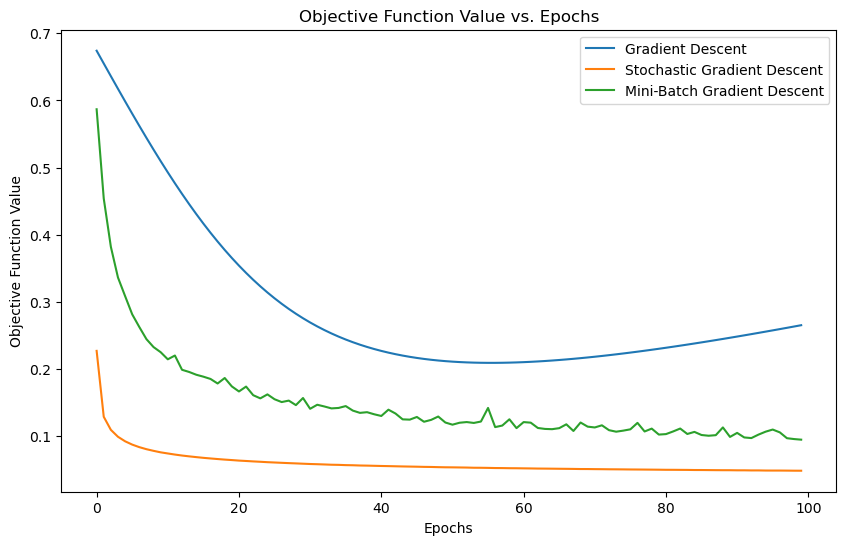

In [302]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot objective function values for GD, SGD, and MBGD
plt.figure(figsize=(10, 6))
plt.plot(objvals_gd, label='Gradient Descent')
plt.plot(objvals_sgd, label='Stochastic Gradient Descent')
plt.plot(objvals_mbgd, label='Mini-Batch Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value vs. Epochs')
plt.legend()
plt.show()



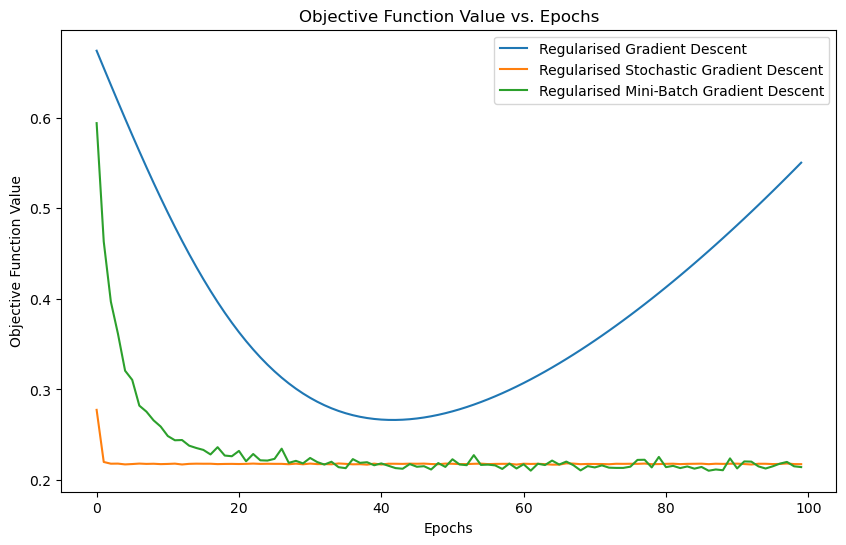

In [303]:
plt.figure(figsize=(10, 6))
plt.plot(objvals_gd_reg, label='Regularised Gradient Descent')
plt.plot(objvals_sgd_reg, label='Regularised Stochastic Gradient Descent')
plt.plot(objvals_mbgd_reg, label='Regularised Mini-Batch Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value vs. Epochs')
plt.legend()
plt.show()


# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [304]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    xw = np.dot(X,w)
    f = np.array([1 if i > 0 else -1 for i in xw])
    return f

In [305]:
# evaluate training error of logistric regression and regularized version
def training_error(y_true,y_predicted):
    return np.mean(y_true!=y_predicted)

#GD 
pred_train = predict(w_opt,x_train)
error = training_error(y_train,pred_train)
print(f'accuracy in GD: {1-error:.4f}')

#RGD 
pred_train_reg = predict(w_opt_reg,x_train)
error_reg = training_error(y_train,pred_train_reg)
print(f'accuracy in RGD: {1-error_reg:.4f}')

#SGD 
pred_train_sgd = predict(w_opt_sgd,x_train)
error_sgd = training_error(y_train,pred_train_sgd)
print(f'accuracy in SGD: {1-error_sgd:.4f}')

#RSGD 
pred_train_sgd_reg = predict(w_opt_sgd_reg,x_train)
error_sgd_reg = training_error(y_train,pred_train_sgd_reg)
print(f'accuracy in RSGD: {1-error_sgd_reg:.4f}')

#MBGD 
pred_train_mbgd = predict(w_opt_mbgd,x_train)
error_mbgd = training_error(y_train,pred_train_mbgd)
print(f'accuracy in MBGD: {1-error_mbgd:.4f}')

#RMBGD 
pred_train_mbgd_reg = predict(w_opt_mbgd_reg,x_train)
error_mbgd_reg = training_error(y_train,pred_train_mbgd_reg)
print(f'accuracy in RMBGD: {1-error_mbgd_reg:.4f}')

accuracy in GD: 0.9121
accuracy in RGD: 0.9121
accuracy in SGD: 0.9868
accuracy in RSGD: 0.9736
accuracy in MBGD: 0.9736
accuracy in RMBGD: 0.9714


In [306]:
# evaluate testing error of logistric regression and regularized version
def test_error(y_true,y_predicted):
    return np.mean(y_true!=y_predicted)

#GD 
pred_test = predict(w_opt,x_test)
error = test_error(y_test,pred_test)
print(f'accuracy in GD: {1-error:.4f}')

#RGD 
pred_test_reg = predict(w_opt_reg,x_test)
error_reg = test_error(y_test,pred_test_reg)
print(f'accuracy in RGD: {1-error_reg:.4f}')

#SGD 
pred_test_sgd = predict(w_opt_sgd,x_test)
error_sgd = test_error(y_test,pred_test_sgd)
print(f'accuracy in SGD: {1-error_sgd:.4f}')

#RSGD 
pred_test_sgd_reg = predict(w_opt_sgd_reg,x_test)
error_sgd_reg = test_error(y_test,pred_test_sgd_reg)
print(f'accuracy in RSGD: {1-error_sgd_reg:.4f}')

#MBGD 
pred_test_mbgd = predict(w_opt_mbgd,x_test)
error_mbgd = test_error(y_test,pred_test_mbgd)
print(f'accuracy in MBGD: {1-error_mbgd:.4f}')

#RMBGD 
pred_test_mbgd_reg = predict(w_opt_mbgd_reg,x_test)
error_mbgd_reg = test_error(y_test,pred_test_mbgd_reg)
print(f'accuracy in RMBGD: {1-error_mbgd_reg:.4f}')

accuracy in GD: 0.9649
accuracy in RGD: 0.9649
accuracy in SGD: 0.9825
accuracy in RSGD: 0.9737
accuracy in MBGD: 0.9649
accuracy in RMBGD: 0.9737


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model.

In [307]:
#for GD (since training accuracy is low compared to other models)

w_tuning = np.zeros((d, 1))

# Set regularization parameter and learning rate
lam = 0.0
learning_rate = 0.001 # Before it was 0.01

# Train logistic regression using gradient descent
w_opt, objvals_gd = gradient_descent(x_train.values, y_train.values.reshape(-1, 1), lam, learning_rate, w)

pred_train = predict(w_opt,x_train)
error = training_error(y_train,pred_train)
print(f'\nTraining accuracy in GD after tuining learning rate: {1-error:.4f}')

pred_test = predict(w_opt,x_test)
error = test_error(y_test,pred_test)
print(f'Testing accuracy in GD after tuining learning rate: {1-error:.4f}')

Epoch 0,  Objective value: 0.09935035244070015
Epoch 10,  Objective value: 0.09848531096750143
Epoch 20,  Objective value: 0.09769882003253846
Epoch 30,  Objective value: 0.09698757572235392
Epoch 40,  Objective value: 0.09634847204401542
Epoch 50,  Objective value: 0.09577859105808653
Epoch 60,  Objective value: 0.09527519347051822
Epoch 70,  Objective value: 0.09483570969886472
Epoch 80,  Objective value: 0.09445773141904412
Epoch 90,  Objective value: 0.09413900359076258

Training accuracy in GD after tuining learning rate: 0.9714
Testing accuracy in GD after tuining learning rate: 0.9649
